In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
dataset=pd.read_csv("Churn_Modelling.csv")
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
dataset.shape

(10000, 14)

In [9]:
df=dataset.drop(['RowNumber','Surname','Geography','Gender','Tenure','Age'],axis='columns')
df

,CustomerId,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,0.00,1,1,1,101348.88,1
1,15647311,608,83807.86,1,0,1,112542.58,0
2,15619304,502,159660.80,3,1,0,113931.57,1
3,15701354,699,0.00,2,0,0,93826.63,0
4,15737888,850,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...
9995,15606229,771,0.00,2,1,0,96270.64,0
9996,15569892,516,57369.61,1,1,1,101699.77,0
9997,15584532,709,0.00,1,0,1,42085.58,1
9998,15682355,772,75075.31,2,1,0,92888.52,1


In [59]:
x=df.drop(columns=['Exited'])
x.head()

,CustomerId,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15634602,619,0.00,1,1,1,101348.88
1,15647311,608,83807.86,1,0,1,112542.58
2,15619304,502,159660.80,3,1,0,113931.57
3,15701354,699,0.00,2,0,0,93826.63
4,15737888,850,125510.82,1,1,1,79084.10


In [74]:
y=df['Exited'].values
y[:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [75]:
df0=df[:40]
df1=df[40:80]
df2=df[80:]

In [76]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

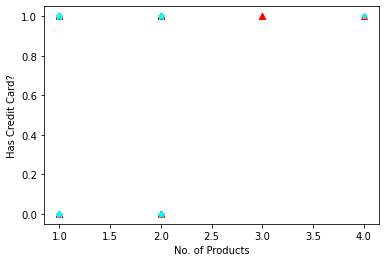

In [77]:
plt.xlabel('No. of Products')
plt.ylabel('Has Credit Card?')
plt.scatter(df0['NumOfProducts'],df0['HasCrCard'],color="red",marker="^")
plt.scatter(df1['NumOfProducts'],df1['HasCrCard'],color="cyan",marker="*")

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=1)

In [79]:
len(x_train)

5000

In [80]:
len(x_test)

5000

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)

In [82]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [84]:
knn.score(x_test,y_test)

0.7918